In [17]:
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn import metrics
import pickle
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.cluster import KMeans

In [18]:
raw_data_1 = pd.read_csv("./LPSE LKPP + pemenang.csv")

raw_data_1.head(10)

,kode,nama_tender,instansi,status_tender,hps,5,6,7,8,9,...,11,12,13,kategori,pagu,hps_detail,nama_pemenang,alamat_pemenang,npwp_pemenang,penawaran_pemenang
0,6599119,Tenaga Ahli Data Driven Kegiatan Koordinasi Se...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],120 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6598119,Tenaga Ahli IT Analisa Sistem Kegiatan Koord...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"183,5 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6597119,Tenaga Ahli Senior Monitoring dan Evaluasi Str...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"228,4 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6596119,Tenaga Ahli Senior Perencanaan Strategic Natio...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"254,1 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6595119,Tenaga Ahli Muda Bidang Energy Policy Kegiatan...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],132 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6594119,Tenaga Ahli Transportasi (Sektor Jalan dan Dar...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],204 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6593119,Tenaga Ahli Muda Transportasi (Sektor Laut) Ke...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"129,9 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6592119,Tenaga Ahli Muda Transportasi Kegiatan Integra...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],132 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6591119,Tenaga Ahli Muda GIS Kegiatan Koordinasi Strat...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"129,9 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6590119,Tenaga Ahli Kelembagaan dan Kebijakan Publik K...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],264 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

In [20]:
result_preprocessing = []
for column in raw_data_1['nama_tender']:
    sentence = column.lower()
    word = word_tokenize(text = sentence)
    result_remove_punctuation = [result for result in word if result not in list(string.punctuation)]
    result_remove_stopwords = [result for result in result_remove_punctuation if not result in stopwords]
    result_remove_stopwords = ' '.join(result_remove_stopwords)
    result_preprocessing.append(result_remove_stopwords)

In [21]:
raw_data_1['preprocessing'] = result_preprocessing

In [22]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_weights_matrix = tfidf_vectorizer.fit_transform(raw_data_1['preprocessing'])
lda = LDA(n_components=20,n_jobs=-1)
lda_output = lda.fit_transform(tfidf_weights_matrix)
scaler = StandardScaler()
vectorScaler = scaler.fit_transform(lda_output)
vectorNormalize = normalize(vectorScaler)

In [23]:
kmeans_obj = KMeans(n_clusters=25, random_state=50)
kmeans_obj.fit(vectorNormalize)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=25, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

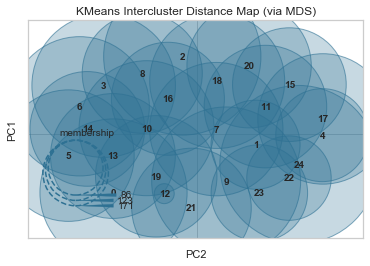

In [24]:
visualizer_kmeans = InterclusterDistance(kmeans_obj, random_state = 50)
visualizer_kmeans.fit(vectorNormalize)
visualizer_kmeans.finalize()

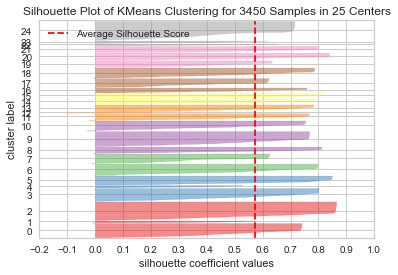

In [25]:
visualizer_kmeans_silhouette = SilhouetteVisualizer(kmeans_obj, color='yellowbrick')
visualizer_kmeans_silhouette.fit(vectorNormalize)
visualizer_kmeans_silhouette.show()

In [26]:
labels = kmeans_obj.labels_
silhouette_score = metrics.silhouette_score(vectorNormalize, labels, metric='euclidean')
silhouette_score

0.5732834046044392

In [27]:
result_clustering = kmeans_obj.predict(vectorNormalize)

In [28]:
raw_data_1['kategori'] = result_clustering
raw_data_1

,kode,nama_tender,instansi,status_tender,hps,5,6,7,8,9,...,12,13,kategori,pagu,hps_detail,nama_pemenang,alamat_pemenang,npwp_pemenang,penawaran_pemenang,preprocessing
0,6599119,Tenaga Ahli Data Driven Kegiatan Koordinasi Se...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],120 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,17,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli data driven kegiatan koordinasi se...
1,6598119,Tenaga Ahli IT Analisa Sistem Kegiatan Koord...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"183,5 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,17,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli it analisa sistem kegiatan koordin...
2,6597119,Tenaga Ahli Senior Monitoring dan Evaluasi Str...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"228,4 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,17,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli senior monitoring evaluasi strateg...
3,6596119,Tenaga Ahli Senior Perencanaan Strategic Natio...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"254,1 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,17,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli senior perencanaan strategic natio...
4,6595119,Tenaga Ahli Muda Bidang Energy Policy Kegiatan...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],132 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli muda bidang energy policy kegiatan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,40119,Pengadaan Working Furniture <span class='label...,Lembaga Kebijakan Pengadaan Barang/Jasa Pemeri...,Tender Sudah Selesai,"281,8 Jt",Pascakualifikasi Satu File,Lelang Umum,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2011,1,...,0.0,0,24,"Rp 281.825.500,00","Rp 281.825.500,00",CV.PULAU CANDI UTAMA,"Jl. Kramat Raya No.23 E Lt 1 Senen, Jakarta Pu...",01.626.119.0-023.000,"Rp 226.369.000,00",pengadaan working furniture span class='label ...
3446,39119,Pengadaan Living Furniture <span class='label ...,Lembaga Kebijakan Pengadaan Barang/Jasa Pemeri...,Tender Sudah Selesai,"290,2 Jt",Pascakualifikasi Satu File,Lelang Umum,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2011,1,...,0.0,0,24,"Rp 290.237.200,00","Rp 290.237.200,00",PT. Desaku Abadi,"Jl. Kedoya Raya No.53, Kedoya Selatan, Kebon J...",01.724.673.7-039.000,"Rp 251.541.400,00",pengadaan living furniture span class='label l...
3447,36119,PENGADAAN PERALATAN GEROBAK HOME INDUSTRI,Pemerintah Provinsi Bengkulu,Tender Sudah Selesai,"208,3 Jt",Pascakualifikasi Satu File,Lelang Umum,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2011,1,...,0.0,0,11,NaN,NaN,NaN,NaN,NaN,NaN,pengadaan peralatan gerobak home industri
3448,32119,Pengadaan Modul Aplikasi - SIB,Lembaga Kebijakan Pengadaan Barang/Jasa Pemeri...,Tender Sudah Selesai,600 Jt,Pascakualifikasi Satu File,Lelang Umum,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2011,1,...,0.0,0,21,"Rp 600.000.000,00","Rp 600.000.000,00",PT JIREH DATA INTEGRA,KOMPLEK RUKO MEGA GROSIR CEMPAKA MAS BLOK M no...,31.177.558.9-027.000,"Rp 594.000.000,00",pengadaan modul aplikasi sib


In [29]:
raw_data_1.to_csv("dataTender.csv",index=False)